Introduction:

COVID-19 is a disease that emerged in December 2019. It is passed from person to person but can its spread be prevented with good hygiene, wearing a mask, and physical distancing. I wish no one had to suffer from the consequences of contracting this disease but as we have seen there is a very real possibility of severe consequences, the worst being death. In this project I want to focus on who is the most likely to contract the illness and who it affects the most. Maybe with this there can be some solid analysis that helps people realize the impact and importance of this disease on people around Maryland.

In [52]:
import pandas as pd
import seaborn as sns
import re

In [53]:
# Obtaining the data and showing it's content
cases_data_set = pd.read_csv('MD_COVID-19_-_Cases_by_Age_Distribution.csv')
# Dropping the days that are not in both data sets to have an accurate comparison
cases_data_set.drop(cases_data_set.index[0:10], inplace=True)
cases_data_set.drop(columns=['OBJECTID','Age_Unknown'], inplace=True)
# removing outliers and strange data that will interfere
cases_data_set.drop([606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628], inplace=True)
cases_data_set

,DATE,Age_0_to_9,Age_10_to_19,Age_20_to_29,Age_30_to_39,Age_40_to_49,Age_50_to_59,Age_60_to_69,Age_70_to_79,Age_80plus
10,04/08/2020 06:00:00 AM,27,109,625,968,1015,1135,833,550,267
11,04/09/2020 06:00:00 AM,33,127,701,1076,1145,1282,913,600,308
12,04/10/2020 06:00:00 AM,36,146,772,1205,1281,1421,1051,685,371
13,04/11/2020 06:00:00 AM,45,162,855,1317,1413,1565,1141,757,439
14,04/12/2020 06:00:00 AM,52,172,906,1390,1504,1675,1212,816,498
...,...,...,...,...,...,...,...,...,...,...
982,12/06/2022 05:00:00 AM,124096,155040,215597,219129,182515,174148,120900,64554,38059
983,12/07/2022 05:00:00 AM,124158,155114,215723,219259,182620,174279,121013,64629,38121
984,12/08/2022 05:00:00 AM,124251,155195,215860,219403,182751,174411,121177,64714,38188
985,12/09/2022 05:00:00 AM,124336,155278,216023,219581,182874,174604,121335,64814,38247


In [54]:
# Obtaining the data and showing it's content
death_data_set = pd.read_csv('MD_COVID-19_-_Confirmed_Deaths_by_Age_Distribution.csv')
death_data_set.drop(columns=['OBJECTID','Age_Unknown'], inplace=True)
remove = death_data_set['Age_80plus'].loc[lambda x: x==0].index
# removing outliers and strange data that will interfere
death_data_set.drop([606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628], inplace=True)
death_data_set

,DATE,Age_0_to_9,Age_10_to_19,Age_20_to_29,Age_30_to_39,Age_40_to_49,Age_50_to_59,Age_60_to_69,Age_70_to_79,Age_80plus
0,4/8/2020 6:00,0.0,0.0,0.0,4.0,4.0,16.0,26.0,39.0,35.0
1,4/9/2020 6:00,0.0,0.0,0.0,4.0,4.0,16.0,28.0,43.0,43.0
2,4/10/2020 6:00,0.0,0.0,0.0,5.0,5.0,20.0,32.0,51.0,58.0
3,4/11/2020 6:00,0.0,0.0,1.0,8.0,5.0,22.0,42.0,57.0,71.0
4,4/12/2020 6:00,0.0,0.0,1.0,9.0,5.0,25.0,51.0,65.0,79.0
...,...,...,...,...,...,...,...,...,...,...
972,12/6/2022 5:00,9.0,18.0,81.0,227.0,573.0,1393.0,2710.0,3876.0,6612.0
973,12/7/2022 5:00,9.0,18.0,81.0,227.0,574.0,1392.0,2710.0,3880.0,6618.0
974,12/8/2022 5:00,9.0,18.0,81.0,227.0,574.0,1392.0,2710.0,3881.0,6624.0
975,12/9/2022 5:00,9.0,18.0,81.0,227.0,574.0,1393.0,2710.0,3885.0,6627.0


Now that we have our two data sets we can begin to do work on them. The first thing that I am going to do with these data sets is begin plotting them over the dates that are given.

<AxesSubplot:title={'center':'Cases per age group over months'}, xlabel='Date', ylabel='Cases'>

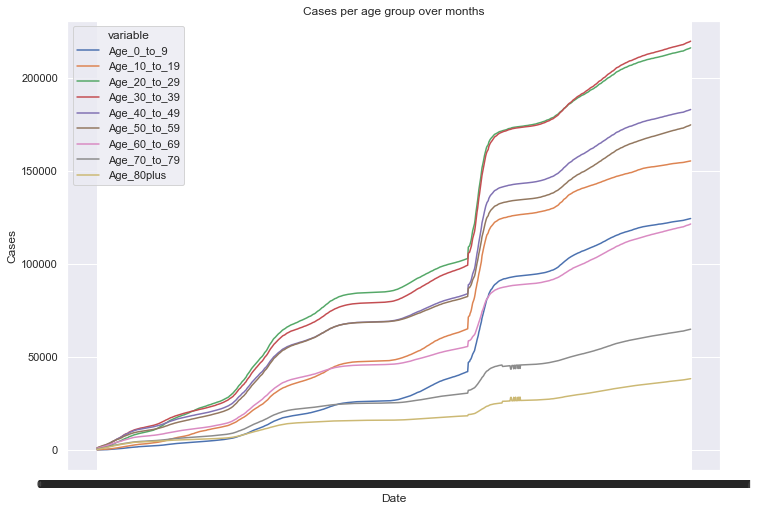

In [61]:
fg = sns.lineplot(x = 'DATE', y = 'value', hue='variable', data = pd.melt(cases_data_set, 'DATE'))
fg.set(xlabel ="Date", ylabel = "Cases", title ='Cases per age group over months')
sns.set(rc={'figure.figsize':(11.7,8.27)})
fg

<AxesSubplot:title={'center':'Deaths per age group over months'}, xlabel='Date', ylabel='Deaths'>

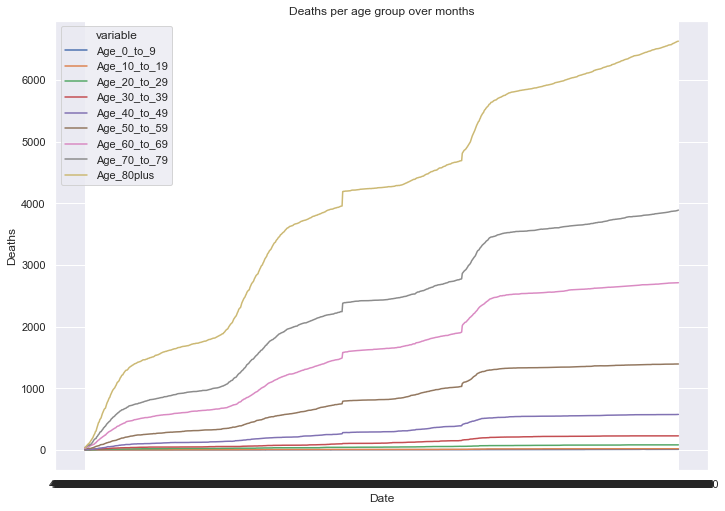

In [62]:
fg = sns.lineplot(x = 'DATE', y = 'value', hue='variable', data = pd.melt(death_data_set, 'DATE'))
fg.set(xlabel ="Date", ylabel = "Deaths", title ='Deaths per age group over months')
fg